In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)
X = 2*np.random.rand(100,1)
y = 6 + 4*X + np.random.rand(100,1)

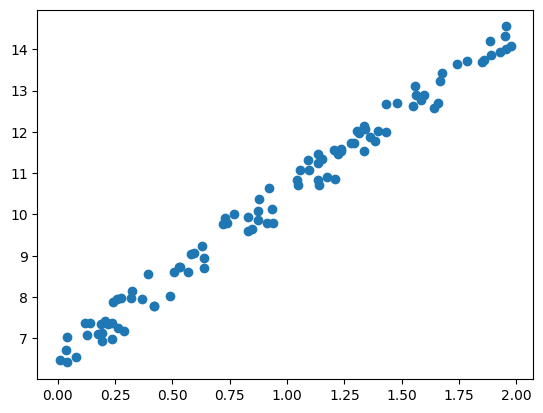

In [15]:
plt.scatter(x, y)

In [8]:
x.shape

(100, 1)

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

lr = model.fit(x, y)
lr.coef_

array([[3.96827553]])

In [35]:
lr.intercept_

array([6.55808002])

In [39]:
X = 2*np.random.rand(100)
y = 6+4*X + np.random.rand(100)

x.shape

(100,)

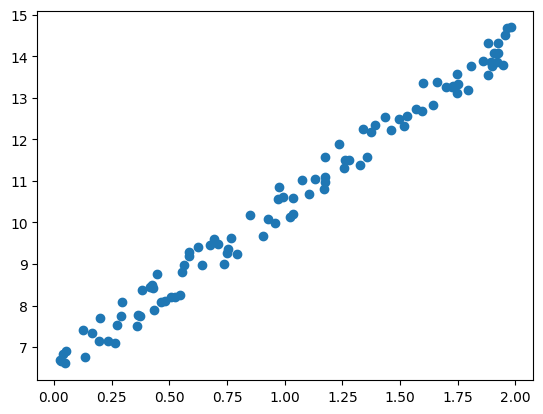

In [10]:
plt.scatter(x, y)

In [17]:
model = LinearRegression(fit_intercept=True)
lr = model.fit(x.reshape(-1, 1), y)

In [18]:
lr.coef_
lr.intercept_

array([6.55808002])

In [21]:
x[:, np.newaxis].shape

(100, 1, 1)

np.newaxis?


In [43]:
# 비용 함수 정의
def get_cost(y, y_hat):
    n = len(y) 
    cost = np.sum( np.square(y - y_hat) ) / n
    return cost

# Batch Gradient Descent
def batch_gradient_descent(b1, b0, X, y, learning_rate = 0.01, iters = 10000):
    n = len(y)
    
    for i in range(iters):
        final_iters = i + 1
        # 예측값 nx1
        y_hat = b0 + b1*X

        # 비용 함수(RSS)
        cost0 = np.sum( np.square(y - y_hat) ) / n

        # 학습률 * 편미분
        b1_update = learning_rate * -(2/n) * X.T @ (y - y_hat)
        b0_update = learning_rate * -(2/n) * np.sum(y - y_hat)

        # 파라미터 업데이트
        b1 = b1 - b1_update
        b0 = b0 - b0_update
        
        # 업데이트 후 비용 함수(RSS)
        y_hat = b0 + b1*X
        cost1 = np.sum( np.square(y - y_hat) ) / n
        
        # 비용 감소가 0.00001보다 작은 경우 stop
        if cost0 - cost1 < 0.00001:
            break
        
    return b1, b0, final_iters

In [44]:
b1, b0, final_iters = batch_gradient_descent(0, 0, X, y, learning_rate = 0.01, iters=1000)

y_hat = b0 + b1[0,0]*X
cost = get_cost(y, y_hat)

print(f"b1: {b1[0,0]:.3f}, b0: {b0:.3f}, iteration: {final_iters}")
print(f"Gradient Descent Total Cost: {cost:.4f}")

b1: 4.033, b0: 6.485, iteration: 975
Gradient Descent Total Cost: 0.0778


In [47]:
# Mini-Batch Stochastic Gradient Descent: MSGD
def mini_stochastic_gradient_descent(w1, w0, X, y, learning_rate = 0.01, iters = 10000, batch_size=10):
    n = batch_size
    
    for i in range(iters):
        # batch_size만큼 랜덤으로 데이터 추출
        np.random.seed(i)
        stochastic_random_index = np.random.permutation(X.shape[0]) # permutation은 정수를 arange 후 셔플
        sample_X = X[ stochastic_random_index[0:batch_size] ]
        sample_y = y[ stochastic_random_index[0:batch_size] ]
                
        # 예측값 nx1
        y_hat = w0 + w1*sample_X

        # 학습률 * 편미분
        w1_update = learning_rate * -(2/n) * sample_X.T @ (sample_y - y_hat)
        w0_update = learning_rate * -(2/n) * np.sum(sample_y - y_hat)

        # 파라미터 업데이트
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
        
    return w1, w0

In [48]:
w1, w0 = mini_stochastic_gradient_descent(0, 0, X, y, iters=1000, batch_size=10)

y_hat = w0 + w1[0,0]*X
cost = get_cost(y, y_hat)

print(f"w1: {w1[0,0]:.3f}, w0: {b0:.3f}")
print(f"Mini Stochastic Gradient Descent Total Cost: {cost:.4f}")

w1: 4.031, w0: 6.486
Mini Stochastic Gradient Descent Total Cost: 0.0777


In [111]:
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from sklearn.datasets import load_boston

# 데이터 셋 로드
boston = load_boston()

# boston 데이터 셋 DataFrame 변환
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)

In [112]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [113]:
# boston 데이터 셋의 target 은 주택 가격이다. 이를 price 칼럼으로 DataFrame에 추가
boston_df['PRICE'] = boston.target
print(f'Boston Dataset 크기 : {boston_df.shape}')
boston_df[:3]

Boston Dataset 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [114]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


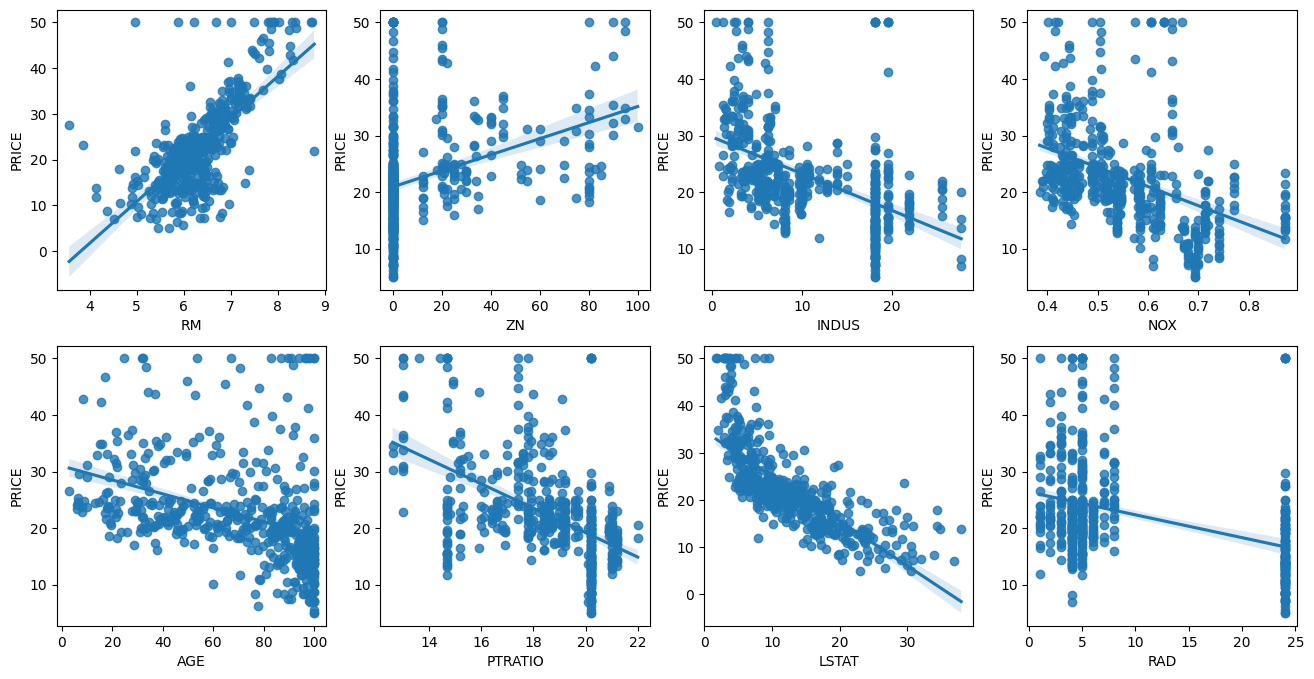

In [115]:
import seaborn as sns

# 2개의 행과 4개의 열을 가진 subplots를 이용
# axs는 4x2의 ax를 가짐
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features) :
    row = int(i/4)
    col = i%4
    # seaborn의 regplot를 이용하여 산점도와 선형회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=boston_df, ax=axs[row][col])

In [116]:
# LinearRegression 클래스를 이용해 회귀 모델 만들기
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis=1, inplace=False)

In [117]:
# train_test_split으로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형회귀 OLS로 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 예측
y_preds = lr.predict(X_test)

# mean_squared_error : 평균 오차 계산
mse = mean_squared_error(y_test, y_preds)
# sqrt에 넣어줌 = 평균 제곱근 오차 계산(rmse)
rmse = np.sqrt(mse)

print(f'MSE : {mse:.3f}, RMSE : {rmse:.3f}')
print(f'Variance score:{r2_score(y_test, y_pred=y_preds)}')

MSE : 17.297, RMSE : 4.159
Variance score:0.757226332313895


In [118]:
# mean_squared_error : 평균 오차 계산
mse = mean_squared_error(y_test, y_preds)
print(np.sqrt(mse),mse**0.5)

4.158956107955691 4.158956107955691


In [119]:
print(f'절편 값: {lr.intercept_}')
print(f'회귀 계수 값 : {np.round(lr.coef_,1)}')

절편 값: 40.995595172164435
회귀 계수 값 : [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [66]:
from sklearn.model_selection import cross_val_score

y_target = boston_df['PRICE']
x_data = boston_df.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

In [68]:
# cross_val_score(0로 폴드 셋 MSE를 구한뒤 이를 기반으로 RMSE를 구한다
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg ==avg_raws=np.mean(rmse_scores)

'dv=5avg_raws=np.mean(rmse_scores)'

In [120]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [121]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변활할 단항식 만들기
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처\n', X)

# (degree=2) : 2차 다항식으로 변환하겠다.
poly = PolynomialFeatures(degree=2)
poly_ftr = poly.fit_transform(X)
print('2차 다항식으로 변환된 계수 피처\n', poly_ftr)

일차 단항식 계수 피처
 [[0 1]
 [2 3]]
2차 다항식으로 변환된 계수 피처
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [122]:
poly3 = PolynomialFeatures(degree=3)
poly_ftr_3 = poly3.fit_transform(X)
print('3차 다항식으로 변환된 계수 피처\n', poly_ftr_3)

3차 다항식으로 변환된 계수 피처
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X) :
    

In [123]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X) :
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

# pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Ression연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression())])
x = np.arange(4).reshape(2, 2)
y = polynomial_func(x)

model = model.fit(x, y)

print('Polynomial 절편 \n', np.round(model.named_steps.linear.intercept_, 2))
print('Polynomial 회귀 계수 \n', np.round(model.named_steps['linear'].coef_,2))

Polynomial 절편 
 1.76
Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [125]:
def true_fun(X) :
    # 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
    return np.cos(1.5*np.pi*X)

# X는 0부터 1까지 30개의 임의 값을 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

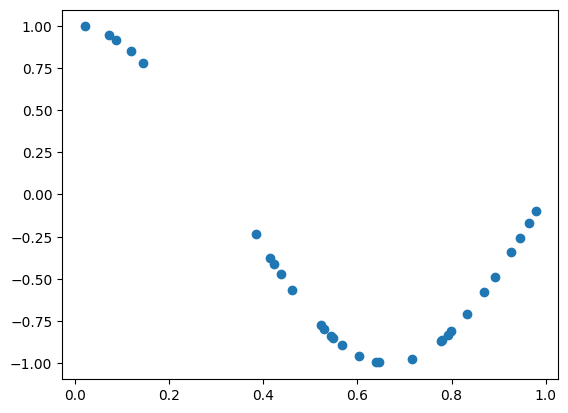

In [126]:
y = true_fun(X)
plt.scatter(X, y)

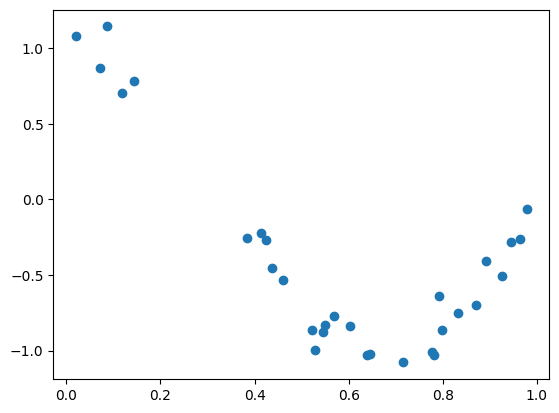

In [127]:
y = true_fun(X)+ np.random.randn(n_samples)*0.1
plt.scatter(X, y)

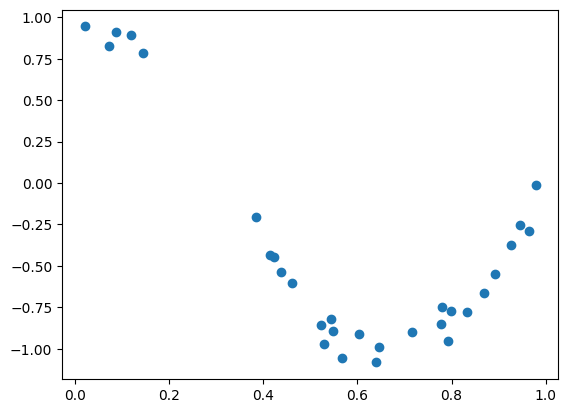


Degree 1 회귀 계수는 [-1.49]
Degree 1, MSE는 0.40749914882743843

Degree 4 회귀 계수는 [  2.7  -27.43  38.45 -14.59]
Degree 4, MSE는 0.00782197333136253

Degree 15 회귀 계수는 [-1.46900000e+02  3.70899000e+03 -4.16930500e+04  2.03111560e+05
  1.17495890e+05 -7.23987037e+06  4.55980728e+07 -1.61271287e+08
  3.76483176e+08 -6.09306953e+08  6.90821140e+08 -5.40216956e+08
  2.78152767e+08 -8.49854729e+07  1.16829064e+07]
Degree 15, MSE는 341762296.3729119


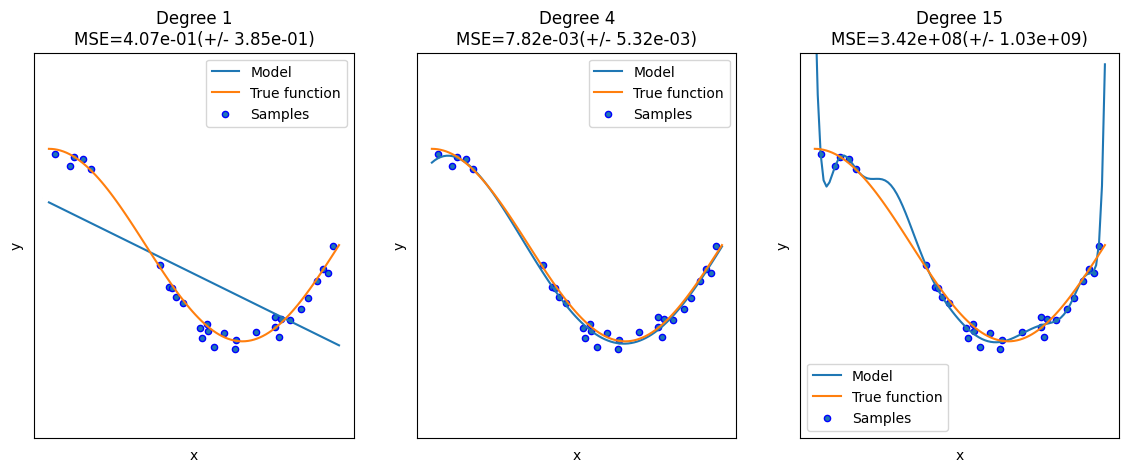

In [100]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]


# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교한다.
for i in range(len(degrees)) :
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree 별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                        ('linear_regression', linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항회귀를 평가
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring='neg_mean_squared_error', cv=10)
    
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    
    print(f'\nDegree {degrees[i]} 회귀 계수는 {np.round(coefficients, 2)}')
    print(f'Degree {degrees[i]}, MSE는 {-1*np.mean(scores)}')
    
    # 테스트 데이터 셋에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교한다.
    # 0부터 1까지 테스트 데이터 셋을 100개로 나누어 예측을 수행한다.
    X_test = np.linspace(0, 1, 100)
    
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), label='Model')
    # 실제값 곡선
    plt.plot(X_test, true_fun(X_test), '-', label='True function')
    plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
    
    plt.xlabel('x');
    plt.ylabel('y');
    plt.ylim((-2, 2));
    plt.legend(loc='best')
    plt.title(f'Degree {degrees[i]}\nMSE={-scores.mean():.2e}(+/- {scores.std():.2e})')
    
plt.show()
    

In [128]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha=10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# (cv = 5) = 5 folds
print(f'5 folds의 개별 Negative MSE scores : {np.round(neg_mse_scores, 3)}')
print(f'5 folds의 개별 RMSE scores : {np.round(rmse_scores, 3)}')
print(f'5 folds의 평균 RMSE : {avg_rmse}')

5 folds의 개별 Negative MSE scores : [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores : [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE : 5.518166280868977


In [129]:
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# 알파 리스트 값을 반복하면서 알파에 따른 평균 RMSE를 구한다
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    # cross_val_score를 이용해 5 folds의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print(f'알파값이 {alpha}일 때, 5 folds의 평균 RMSE : {avg_rmse:.3f}')

알파값이 0일 때, 5 folds의 평균 RMSE : 5.829
알파값이 0.1일 때, 5 folds의 평균 RMSE : 5.788
알파값이 1일 때, 5 folds의 평균 RMSE : 5.653
알파값이 10일 때, 5 folds의 평균 RMSE : 5.518
알파값이 100일 때, 5 folds의 평균 RMSE : 5.330


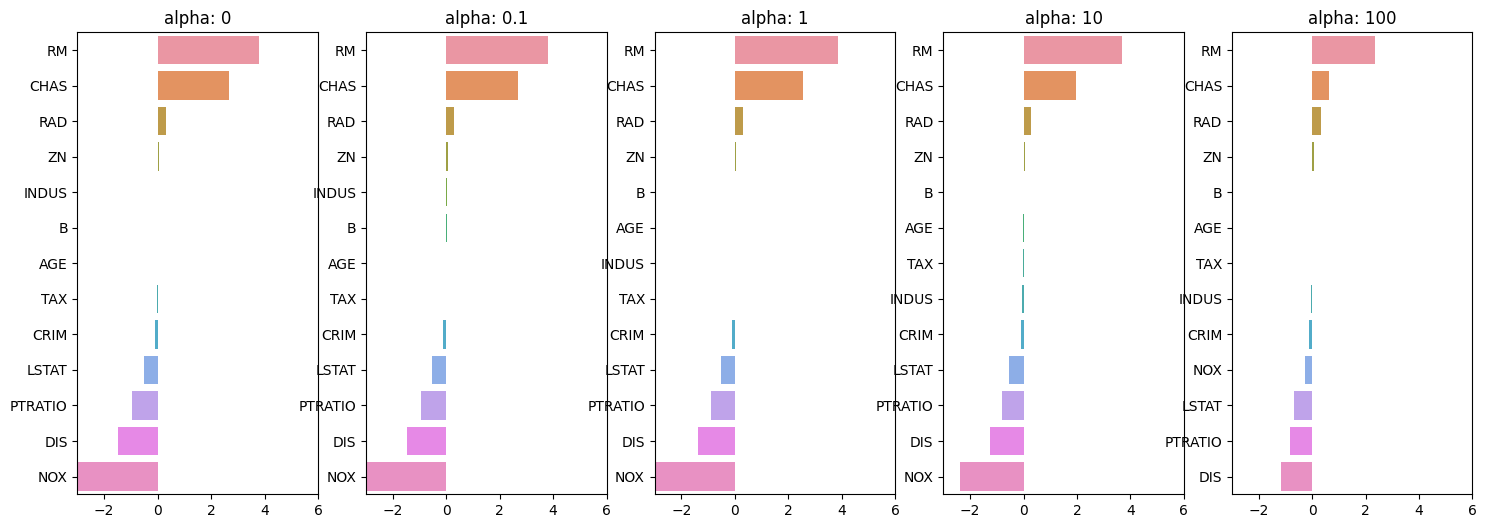

In [131]:
# 각 알파에 따른 회귀 계수 값을 시각화 하기 위해 5개의 열로 된 matplot 축 생성
fig, axs = plt.subplots(1,5, figsize=(18,6))
# 각 알파에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# 위에서 설정한 알파 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장을 진행한다
for i, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    
    # 회귀 계수 데이터프레임
    # 알파에 따른 피처별로 회귀 계수를 Series 변환 후 dataframe 칼럼으로 추가하는 것
    coef_series = pd.Series(data = ridge.coef_, index = X_data.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
    # 회귀 계수 plot
    coef_series = coef_series.sort_values(ascending=False)
    sns.barplot(x = coef_series.values, y = coef_series.index, ax = axs[i])
    
    axs[i].set_title(f"alpha: {alpha}")
    axs[i].set_xlim(-3,6)
    
plt.show()